In [97]:
import pandas as pd
import pickle

In [98]:
df=pd.read_pickle('data/housing_pandas.pickle')

In [99]:
print (df.head())
print(df.shape)

                   AK         AL         AR         AZ         CA         CO  \
Date                                                                           
1975-01-31  34.371830  35.695975  36.738861  28.937735  15.722312  19.603977   
1975-02-28  34.880945  35.896770  37.098962  29.463708  15.775202  19.837138   
1975-03-31  35.402217  36.133518  37.416398  29.959514  15.964942  20.073483   
1975-04-30  35.944703  36.425723  37.677813  30.345148  16.275547  20.301864   
1975-05-31  36.535272  36.695708  37.921099  30.546449  16.533017  20.495075   

                   CT         DC         DE         FL    ...             SD  \
Date                                                      ...                  
1975-01-31  24.369431  18.255987  27.264842  30.997043    ...      37.722210   
1975-02-28  24.908036  18.382701  27.250734  32.229049    ...      37.319634   
1975-03-31  25.313556  18.514587  27.268478  34.027506    ...      36.908861   
1975-04-30  25.541141  18.689302  27.36

## Converting series to df and use of the name parameter in series, plus check the type of the extracted columns,i.e it is a series of df
https://stackoverflow.com/questions/31292140/what-is-the-name-parameter-in-pandas-series

In [101]:
df_usa_series=df['DC']
print(type(df_usa_series))
print (df_usa_series.head())
print (df_usa_series.index.names)
#print (df_usa_series.columns)
df_usa_df=pd.DataFrame(df_usa_series)
print (df_usa_df.head())

<class 'pandas.core.series.Series'>
Date
1975-01-31    18.255987
1975-02-28    18.382701
1975-03-31    18.514587
1975-04-30    18.689302
1975-05-31    18.937116
Name: DC, dtype: float64
['Date']
                   DC
Date                 
1975-01-31  18.255987
1975-02-28  18.382701
1975-03-31  18.514587
1975-04-30  18.689302
1975-05-31  18.937116


## Deleting(Dropping) columns in df

In [102]:
df=df.drop(columns=['DC'])

In [103]:
print (df.shape)

(516, 50)


In [104]:
df_usa=df_usa_df
print (df_usa.head())
print (df.head())

                   DC
Date                 
1975-01-31  18.255987
1975-02-28  18.382701
1975-03-31  18.514587
1975-04-30  18.689302
1975-05-31  18.937116
                   AK         AL         AR         AZ         CA         CO  \
Date                                                                           
1975-01-31  34.371830  35.695975  36.738861  28.937735  15.722312  19.603977   
1975-02-28  34.880945  35.896770  37.098962  29.463708  15.775202  19.837138   
1975-03-31  35.402217  36.133518  37.416398  29.959514  15.964942  20.073483   
1975-04-30  35.944703  36.425723  37.677813  30.345148  16.275547  20.301864   
1975-05-31  36.535272  36.695708  37.921099  30.546449  16.533017  20.495075   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.369431  27.264842  30.997043  30.720917    ...      37.722210   
1975-02-28  24.908036  27.250734  32.229049  

## Adding columns to the Dataframe

In [105]:
df_usa['Waste']=df_usa['DC']*2

In [106]:
print (df_usa.head())

                   DC      Waste
Date                            
1975-01-31  18.255987  36.511975
1975-02-28  18.382701  36.765403
1975-03-31  18.514587  37.029175
1975-04-30  18.689302  37.378605
1975-05-31  18.937116  37.874231


## Deleting the waste column

In [107]:
df_usa=df_usa.drop(columns='Waste')

In [108]:
print (df_usa.head())
print(type(df_usa))

                   DC
Date                 
1975-01-31  18.255987
1975-02-28  18.382701
1975-03-31  18.514587
1975-04-30  18.689302
1975-05-31  18.937116
<class 'pandas.core.frame.DataFrame'>


## Use matplotlib to show the graph of the dataframes

In [111]:
import matplotlib.pyplot as plt

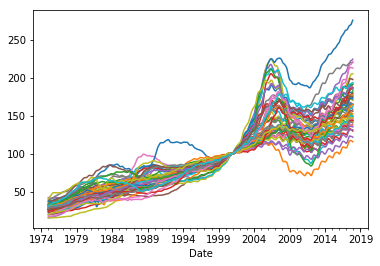

In [113]:
df.plot()
plt.legend().remove()
#plt.show()

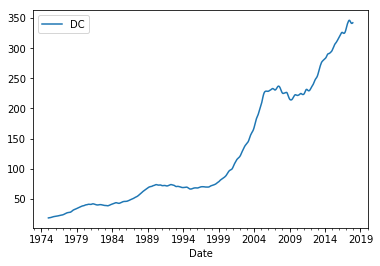

In [114]:
df_usa.plot()
#plt.legend().remove()

## Changing the values of the dataframe to show percent change from the start for every us state

In [115]:
us_states=[]
for i in df.columns:
    us_states.append(i)

In [116]:
print (us_states)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [117]:
for i in us_states:
    df[i]=(df[i]-df[i][0])/(df[i][0])*100.0
print (df.head())

                  AK        AL        AR        AZ        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  1.481200  0.562515  0.980164  1.817604  0.336400  1.189358   
1975-03-31  2.997765  1.225749  1.844199  3.530959  1.543223  2.394954   
1975-04-30  4.576052  2.044344  2.555748  4.863591  3.518790  3.559925   
1975-05-31  6.294231  2.800690  3.217949  5.559227  5.156398  4.545496   

                  CT        DE         FL        GA    ...           SD  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.210168 -0.051745   3.974592 -0.879933    ...    -1.067211   
1975-03-31  3.874219  0.013333   9.776619 -1.245574    ...    -2.156154   
1975-04-30  4.808115  0.358817  16.843650 -1.040342    ...    -3.244698   
1975-05-31  5.107319  1.089500 

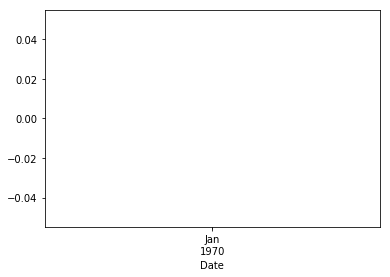

In [91]:
df.plot()
plt.legend().remove()
plt.show()

In [118]:
df_usa['DC']=(df_usa['DC']-df_usa['DC'][0])/(df_usa['DC'][0])*100.0
print (df_usa.head())

                  DC
Date                
1975-01-31  0.000000
1975-02-28  0.694096
1975-03-31  1.416522
1975-04-30  2.373550
1975-05-31  3.730985


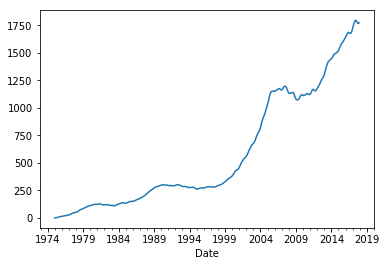

In [119]:
df_usa.plot()
plt.legend().remove()

## Save the modified dataframes into pickle

In [121]:
df.to_pickle('data/percent_change_df.pickle')
df_usa.to_pickle('data/percent_change_df_usa.pickle')

## Print the correlation matrix

In [122]:
corre=df.corr()

In [123]:
print (corre)

          AK        AL        AR        AZ        CA        CO        CT  \
AK  1.000000  0.950610  0.970727  0.918549  0.928878  0.957982  0.882907   
AL  0.950610  1.000000  0.995365  0.941353  0.944611  0.956365  0.951143   
AR  0.970727  0.995365  1.000000  0.940941  0.948633  0.968791  0.941536   
AZ  0.918549  0.941353  0.940941  1.000000  0.978999  0.924302  0.912054   
CA  0.928878  0.944611  0.948633  0.978999  1.000000  0.943838  0.931867   
CO  0.957982  0.956365  0.968791  0.924302  0.943838  1.000000  0.867912   
CT  0.882907  0.951143  0.941536  0.912054  0.931867  0.867912  1.000000   
DE  0.939222  0.983180  0.977601  0.948140  0.963471  0.922901  0.979212   
FL  0.910402  0.933786  0.933325  0.994902  0.987448  0.918498  0.918995   
GA  0.910016  0.978893  0.970564  0.954176  0.956576  0.956381  0.940342   
HI  0.951615  0.946633  0.953930  0.926143  0.957347  0.935663  0.906023   
IA  0.958801  0.985911  0.990382  0.920274  0.936543  0.979528  0.906940   
ID  0.957555